In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [19]:
df1 = pd.read_csv("/content/takehome_users.csv", encoding = "ISO-8859-1")
df1

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [20]:
df2 = pd.read_csv("/content/takehome_user_engagement.csv")
df2

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [21]:
df1.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [22]:
df2.isna().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

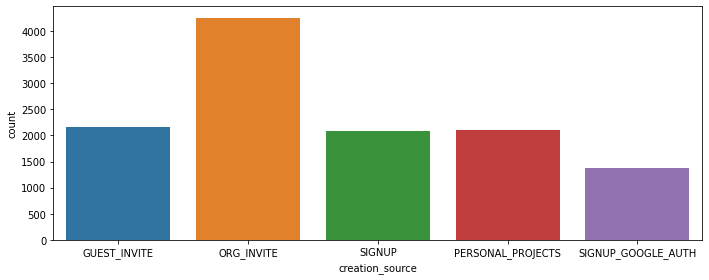

In [23]:
fig = plt.subplots(figsize=(10,4))
sns.countplot(x='creation_source',data=df1)

plt.tight_layout()
plt.show()

# Adopted User:

In [24]:
import datetime
from datetime import timedelta

In [25]:
df2['time_stamp'] = pd.to_datetime(df2['time_stamp'])         # converting into datetime format
df2['time_stamp']

0        2014-04-22 03:53:30
1        2013-11-15 03:45:04
2        2013-11-29 03:45:04
3        2013-12-09 03:45:04
4        2013-12-25 03:45:04
                 ...        
207912   2013-09-06 06:14:15
207913   2013-01-15 18:28:37
207914   2014-04-27 12:45:16
207915   2012-06-02 11:55:59
207916   2014-01-26 08:57:12
Name: time_stamp, Length: 207917, dtype: datetime64[ns]

In [26]:
def logins_in_days(df, days=7, logins=3):      
    
    df['date'] = df['time_stamp'].dt.date       
    df = df.drop_duplicates(subset='date').sort_values('date')    
    days_taken = df['date'].diff(periods=logins-1)   # days_taken for 3 logins
    return any(days_taken <= timedelta(days=days))  # returns true if days_taken <=7 days

In [27]:
adopted = df2.groupby('user_id').apply(logins_in_days)  # grouping based on user_id
adopted.name = 'adopted_user'                             # renaming the column
adopted

user_id
1        False
2         True
3        False
4        False
5        False
         ...  
11996    False
11997    False
11998    False
11999    False
12000    False
Name: adopted_user, Length: 8823, dtype: bool

In [28]:
df1 = df1.set_index(['object_id'])    
df1.index.name = 'user_id'        

In [29]:
df1 = pd.concat([df1, adopted], axis=1, join='inner')  
df1['adopted_user'] = df1['adopted_user'].astype(int)       

df1

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
user_id,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0
...,...,...,...,...,...,...,...,...,...,...
11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0
11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,0
11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0


In [30]:
df10=df1.dropna(axis='columns')
df10

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted_user
user_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,0
...,...,...,...,...,...,...,...,...,...
11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,0
11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,0
11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,0


In [32]:
df10.isna().sum()

creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
adopted_user                  0
dtype: int64

In [35]:
df10['creation_source'].unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [37]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
df10['creation_source']=lr.fit_transform(df10['creation_source'])
df10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted_user
user_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,0,1.398139e+09,1,0,11,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1,1.396238e+09,0,0,1,1
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1,1.363735e+09,0,0,94,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,0,1.369210e+09,0,0,1,0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,0,1.358850e+09,0,0,193,0
...,...,...,...,...,...,...,...,...,...
11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,1,1.378448e+09,0,0,89,0
11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,4,1.358275e+09,0,0,200,0
11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,0,1.398603e+09,1,1,83,0


In [38]:
# splitting
from sklearn.model_selection import train_test_split

X = df10.iloc[:,4:-1]
y = df10.adopted_user

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train) #train the model
  model.score(X_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.8900355269835899  Cross-Val score :  0.8886852906205698
Learning rate :  0.02  Train score :  0.8934190492302487  Cross-Val score :  0.8893606804774317
Learning rate :  0.03  Train score :  0.8932498731179157  Cross-Val score :  0.8905451136415603
Learning rate :  0.04  Train score :  0.895279986465911  Cross-Val score :  0.8895298852151644
Learning rate :  0.05  Train score :  0.8957875148029099  Cross-Val score :  0.8895298852151642
Learning rate :  0.1  Train score :  0.900693622060565  Cross-Val score :  0.8878372662002103
Learning rate :  0.11  Train score :  0.9008627981728979  Cross-Val score :  0.8869909566927333
Learning rate :  0.12  Train score :  0.901031974285231  Cross-Val score :  0.8874985709059313
Learning rate :  0.13  Train score :  0.9034004398578921  Cross-Val score :  0.8863147093794301
Learning rate :  0.14  Train score :  0.9015395026222297  Cross-Val score :  0.8871604472492798
Learning rate :  0.15  Train score :  0.9040

In [42]:
model = xgb.XGBClassifier(learning_rate = 0.05, n_estimators=100, verbosity = 0)
model.fit(X_train,y_train) #train the model
model.score(X_test, y_test) # scoring the model - r2 squared

0.8863324175824175

In [ ]:
# modelling
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7647664835164835

In [ ]:
feature_importance = pd.DataFrame()
feature_importance['coef'] = rf.feature_importances_
feature_importance = feature_importance.set_index(X.columns)
feature_importance.coef.nlargest(5)

invited_by_user_id            0.567444
org_id                        0.407021
opted_in_to_mailing_list      0.014183
enabled_for_marketing_drip    0.011352
Name: coef, dtype: float64

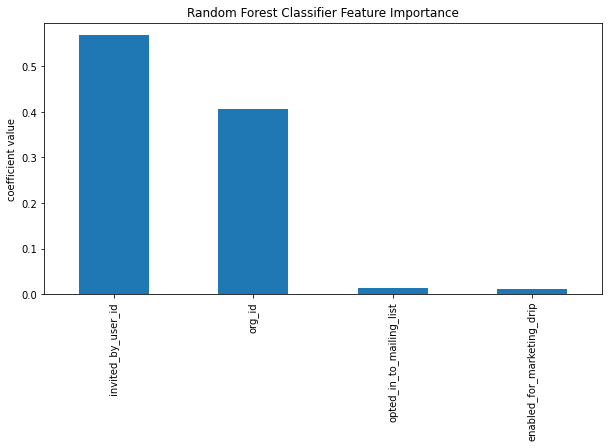

In [ ]:
#plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
(feature_importance['coef']).nlargest(5).plot(kind='bar', x=feature_importance.index)
plt.title('Random Forest Classifier Feature Importance')
plt.ylabel('coefficient value')
plt.show()